# Allstate Claims Severity

In [1]:
import warnings
warnings.filterwarnings('ignore')

import zipfile
import pandas as pd

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


from sklearn.preprocessing import OneHotEncoder

pd.options.mode.chained_assignment = None

In [2]:
#extract all zipped files
with zipfile.ZipFile("train.csv.zip","r") as zip_ref:
    zip_ref.extractall()
with zipfile.ZipFile("test.csv.zip","r") as zip_ref:
    zip_ref.extractall()
with zipfile.ZipFile("sample_submission.csv.zip","r") as zip_ref:
    zip_ref.extractall()

In [3]:
#reading all the files as dataframes
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [4]:
print("shape of train: ", train.shape)
print("shape of test: ",test.shape)
print("shape of submission: ",submission.shape)

shape of train:  (188318, 132)
shape of test:  (125546, 131)
shape of submission:  (125546, 2)


In [5]:
#getting summary statistics of columns
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [6]:
#datatypes of columns
print("Datatypes of columns: ")
print(train.dtypes.value_counts())
print('\n')
print("Datatype of response variable: ", train['loss'].dtype)
print("Datatype of id: ", train['id'].dtype)

Datatypes of columns: 
object     116
float64     15
int64        1
dtype: int64


Datatype of response variable:  float64
Datatype of id:  int64


In [8]:
# print all columns in dataframe
pd.set_option('display.max_columns', None)

train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [9]:
#From above, we note that we can remove id column
#we have to check the number of unique values in categorical column

In [10]:
train.drop('id', axis = 1, inplace = True)

In [11]:
pd.reset_option("^display")
#check for missing values
sum(train.isnull().sum())

0

In [12]:
#no missing values
train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


# EDA

## Plotting response variable

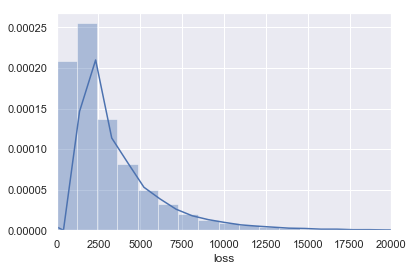

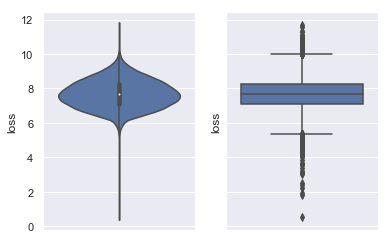

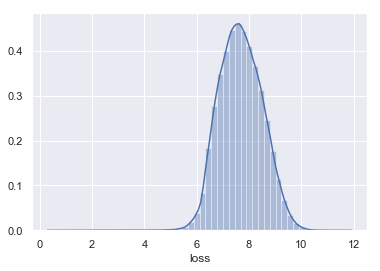

In [33]:
ax1 = sns.distplot(train['loss'], bins = 100, kde= True)
ax1.set(xlim = (0,20000))
plt.show()

#Log transformation of loss column

log_loss = np.log1p(train['loss'])
fig, (ax2, ax3) = plt.subplots(ncols = 2, sharey = True)
sns.violinplot(y=log_loss, ax = ax2)
sns.boxplot(y=log_loss, ax = ax3)
plt.show()

sns.distplot(np.log1p(train['loss']))
plt.show()

## Plotting continuous features

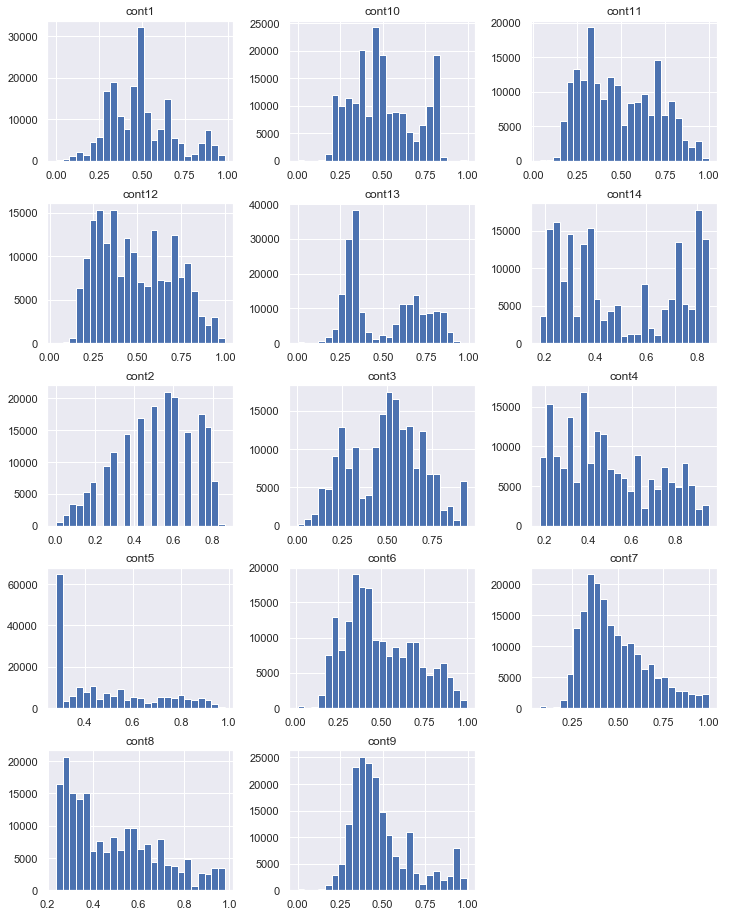

In [42]:
train_float_col = train.select_dtypes(include = ['float64'])
train_float_col.drop('loss', axis = 1, inplace = True)
#histogram of continuous features
fig = train_float_col.hist(layout = (5,3), figsize = (12,16), bins = 25)

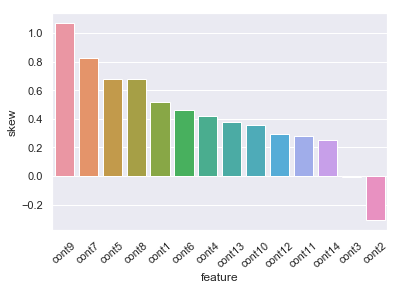

In [64]:
skew_table = train_float_col.skew().sort_values(ascending = False).reset_index()
skew_table.columns = ['feature', 'skew']
sns.barplot(x = 'feature', y = 'skew', data = skew_table)
plt.xticks(rotation = 40)
plt.show()
#values close to zero show less skew

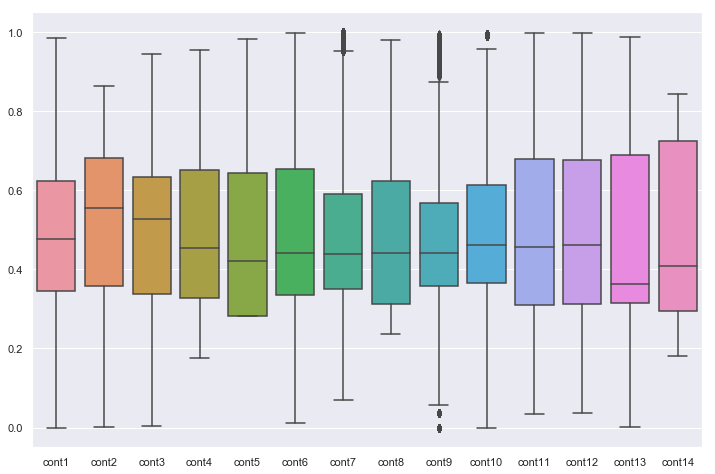

In [66]:
#Boxplot of continuous features
plt.figure(figsize = (12,8))
fig = sns.boxplot(data = train_float_col)

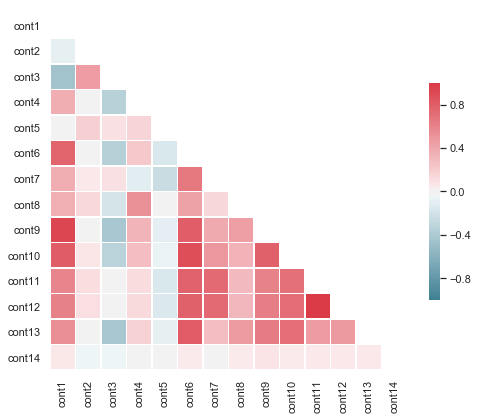

In [68]:
#Finding correlation
sns.set(style="white")
train_float_col_corr = train_float_col.corr()

mask = np.zeros_like(train_float_col_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (8,8))
cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(train_float_col_corr, mask=mask, cmap=cmap, vmax=1, vmin = -1,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### As seen above, there are definitely highly correlated continuous features. Plotting highly correlated features below:

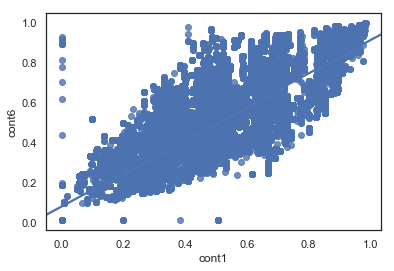

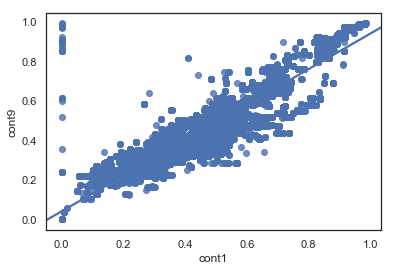

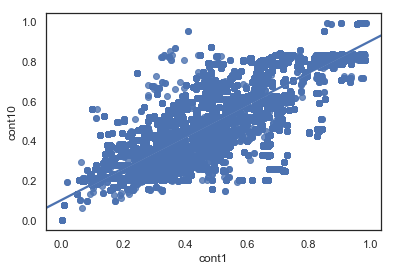

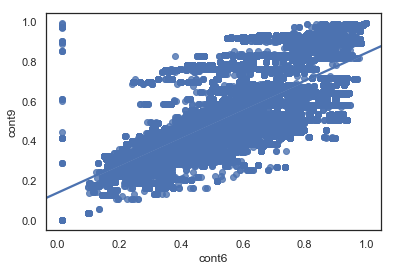

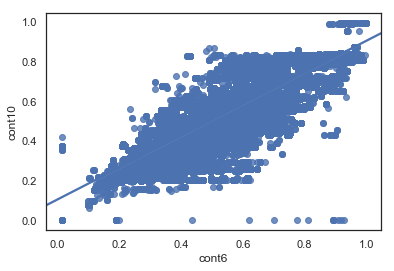

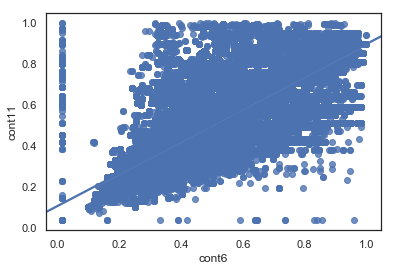

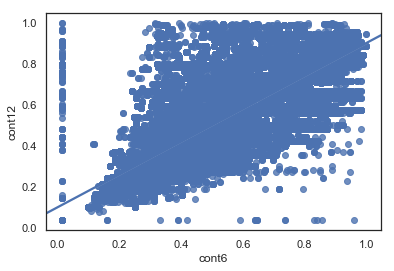

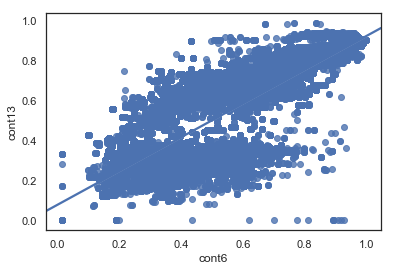

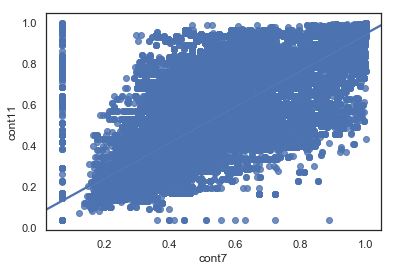

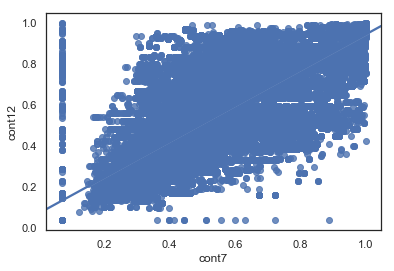

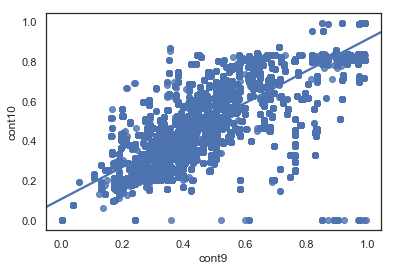

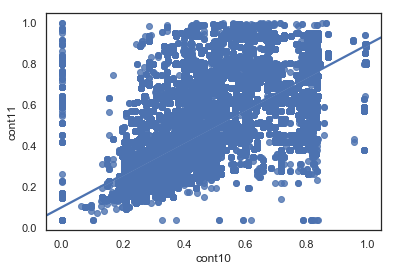

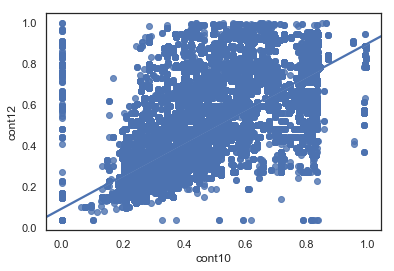

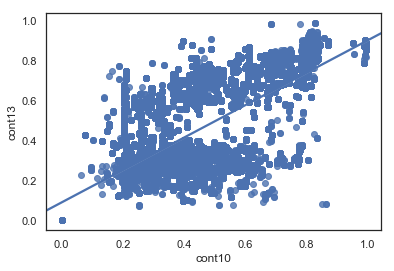

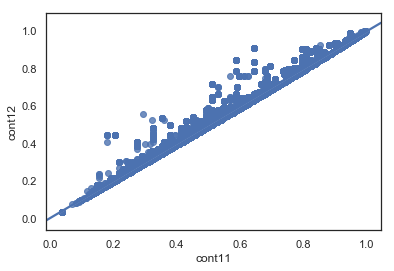

In [69]:
for i in range(0,14):
    for j in range(i+1,14):
        if(abs(train_float_col_corr.iloc[i,j]) >= 0.7):
            sns.regplot(train[train_float_col.columns[i]], train[train_float_col.columns[j]])
            plt.show()

## Exploring Categorical features

In [310]:
train_obj_col = train.select_dtypes(include = ['object'])

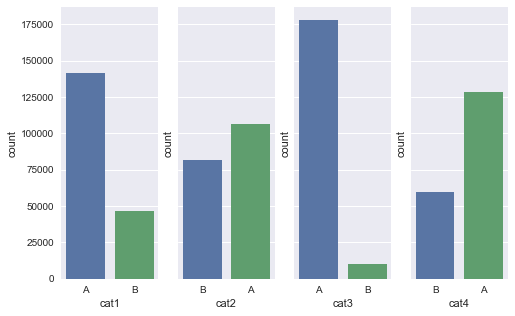

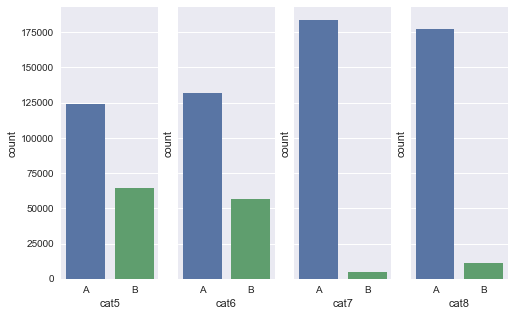

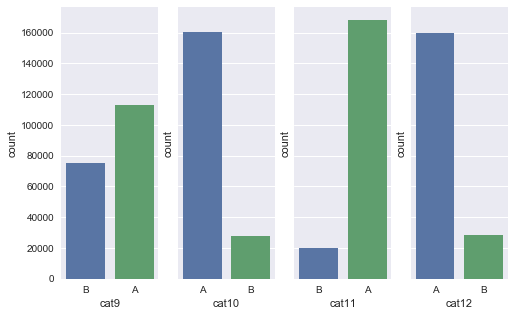

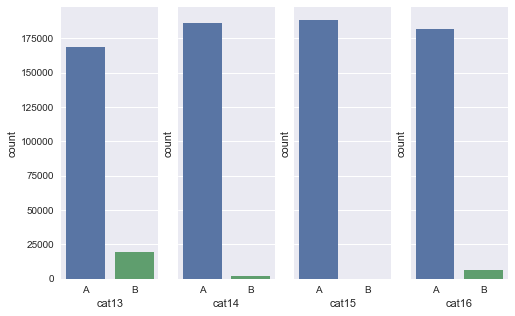

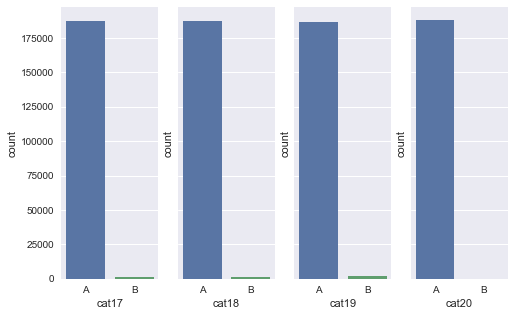

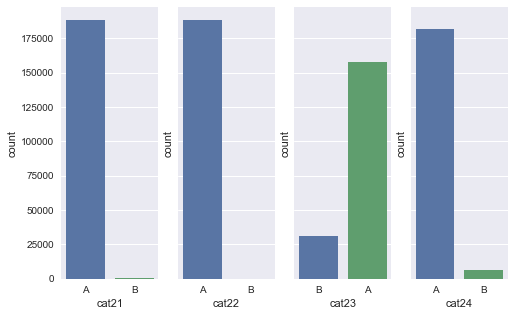

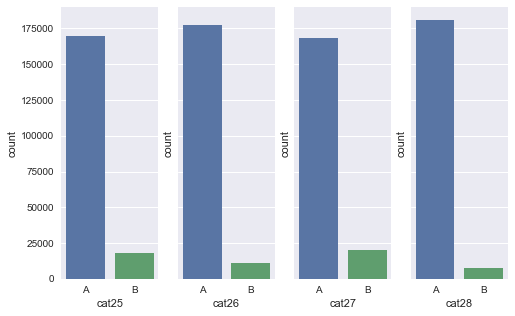

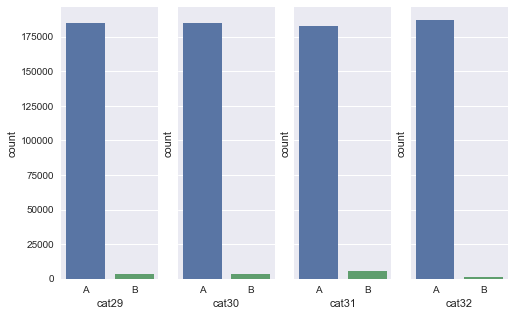

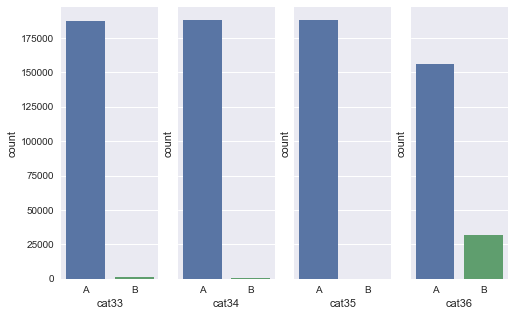

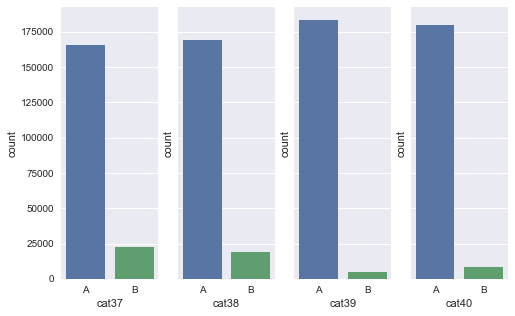

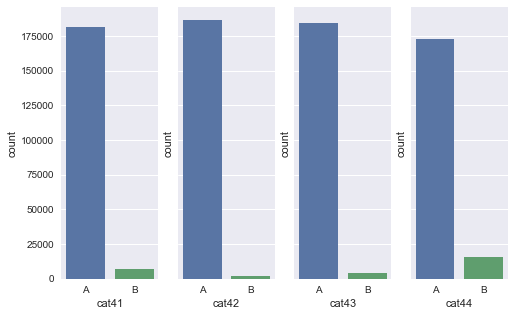

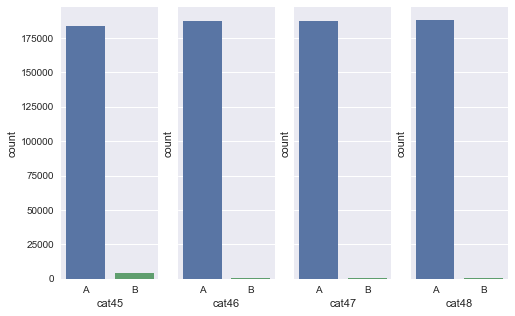

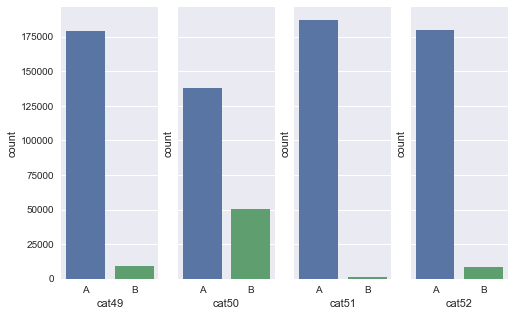

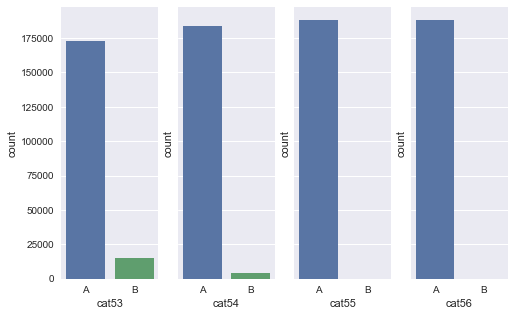

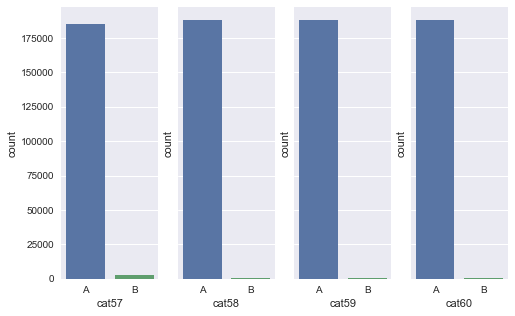

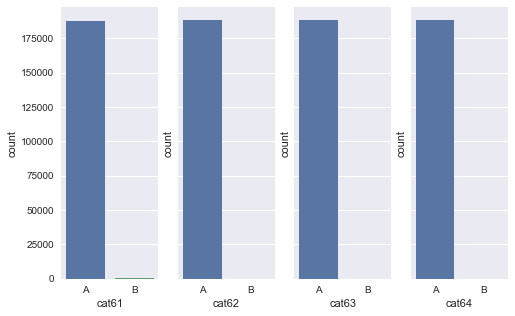

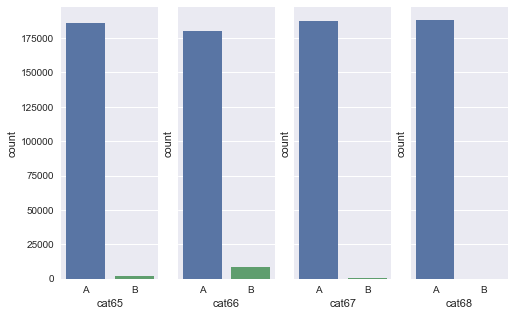

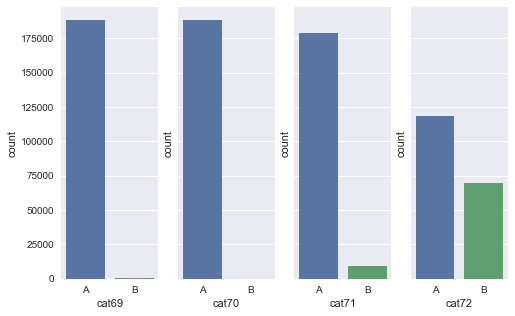

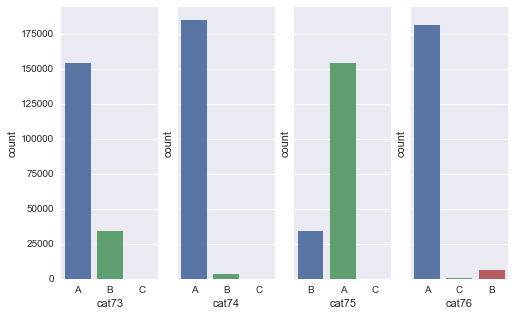

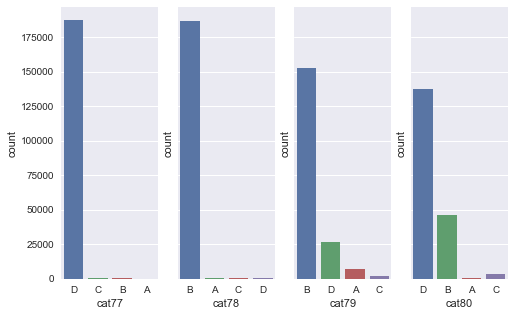

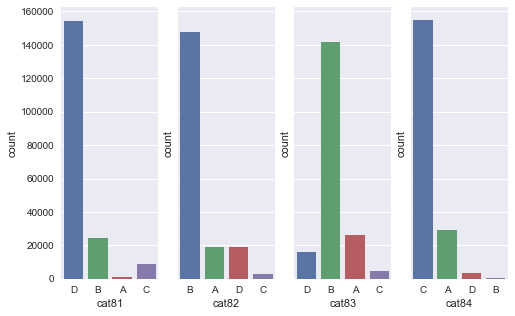

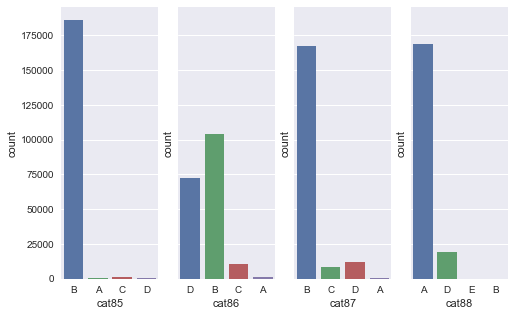

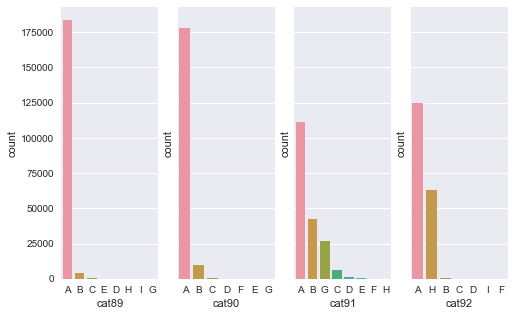

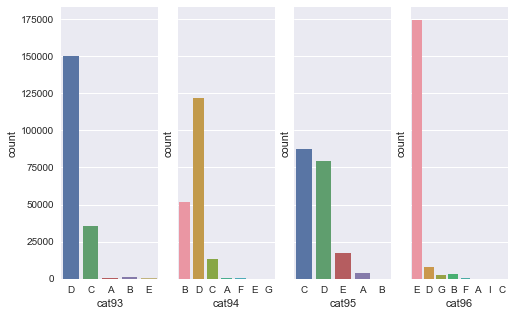

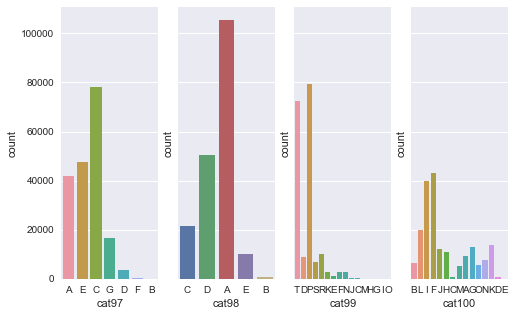

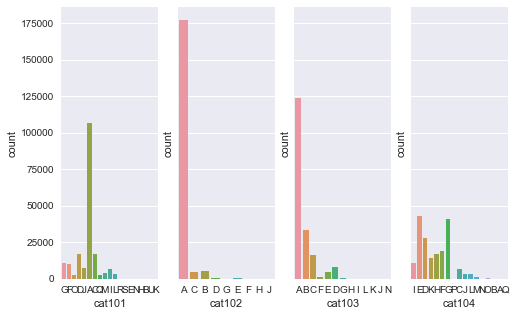

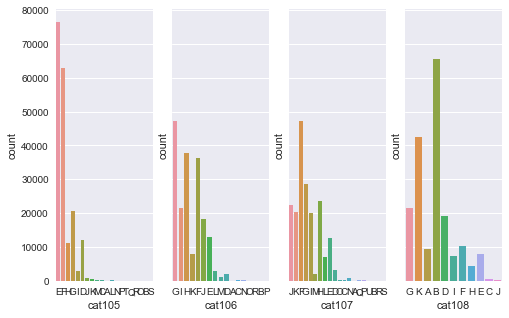

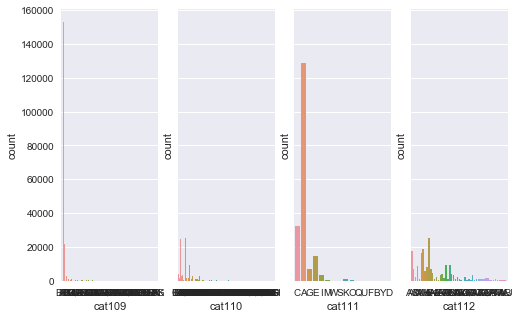

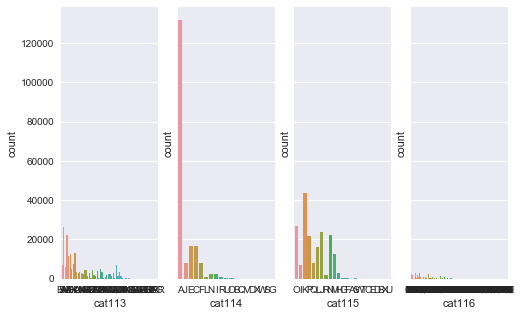

In [393]:
for i in range(29):
    fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(8,5))
    for j in range(4):
        sns.countplot(train_obj_col.columns[i*4+j], data = train_obj_col, ax = ax[j])

In [408]:
for col in train_obj_col.columns:
    if(train_obj_col[col].nunique()>20):
        print(train_obj_col[col].name,":", train_obj_col[col].nunique())

cat109 : 84
cat110 : 131
cat112 : 51
cat113 : 61
cat115 : 23
cat116 : 326


#### Encoding categorical data

In [679]:
y = train['loss']
test.drop('id', axis = 1, inplace = True)

In [706]:
one_hot_encoded_train = pd.get_dummies(train)
one_hot_encoded_test = pd.get_dummies(test)
final_train, final_test = one_hot_encoded_train.align(one_hot_encoded_test, 
                                                      join = 'inner', axis = 1)

In [708]:
#final_test.drop('loss', axis = 1, inplace = True)

In [709]:
final_test.dtypes.value_counts()

uint8      1065
float64      14
dtype: int64

In [722]:
#for col in train.columns: 
    if(train[col].dtype == 'object'):
        print(train[col].name)

IndentationError: unexpected indent (<ipython-input-722-a475d945c0ba>, line 2)

In [724]:
null_col_df = final_test.isnull().sum(axis=0).sort_values(ascending=False).reset_index()
null_col_df.columns = ['column_name', 'missing_count']
null_col_df

,column_name,missing_count
0,cat116_Y,0
1,cat104_D,0
2,cat105_A,0
3,cat104_Q,0
4,cat104_P,0
5,cat104_O,0
6,cat104_N,0
7,cat104_M,0
8,cat104_L,0
9,cat104_K,0


In [729]:
final_train = pd.concat([final_train,y], axis = 1)